## Suicide Count Analysis and Predicting Future Count. 

We are taking dataset of suicide count from year 1985-2016 and we are making a model to predict the count in the upcoming years .

### Visualizing the data and it's Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

In [2]:
suicide=pd.read_csv(r"F:\datasets\master.csv")

In [3]:
suicide.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [4]:
suicide.shape #To know the number of rows and columns

(27820, 12)

In [5]:
suicide.isnull().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

In [6]:
suicide.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [7]:
suicide.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


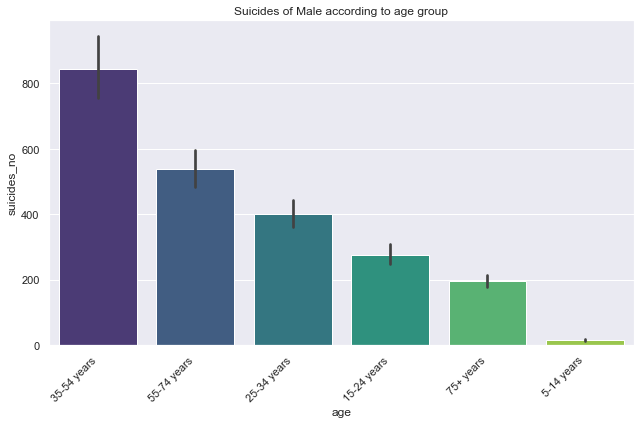

In [8]:
#Distribution of number of suicides in male
male = suicide[suicide['sex']=='male']
plt.figure(figsize=(9,6))
male = male[['suicides_no','year','population','age']]
maleSort = male.groupby(['age','population'],as_index=False).sum().sort_values('suicides_no',ascending=False)
sns.barplot(x='age',y='suicides_no',data=maleSort,palette='viridis').set_title('Suicides of Male according to age group')
plt.xticks(rotation=45,ha='right')
plt.tight_layout()

From this data we came to know that the males from age group '35-54' years records the highest suicides number.

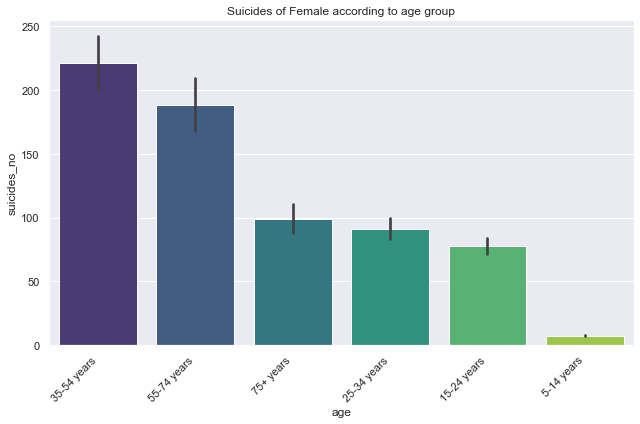

In [9]:
#Distribution of number of suicides in Female
female = suicide[suicide['sex']=='female']
plt.figure(figsize=(9,6))
female = female[['suicides_no','year','population','age']]
femaleSort = female.groupby(['age','population'],as_index=False).sum().sort_values('suicides_no',ascending=False)
sns.barplot(x='age',y='suicides_no',data=femaleSort,palette='viridis').set_title('Suicides of Female according to age group')
plt.xticks(rotation=45,ha='right')
plt.tight_layout()

From here we could analyse that again the females between the age group '35-54' years record the highest suicide number,but it is bit scary that even the children between age group from '5-14' years commit suicide.

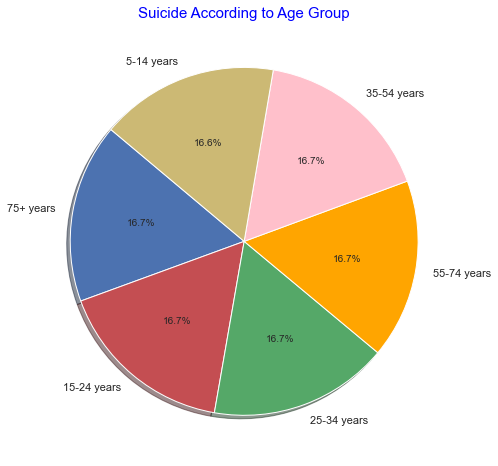

In [10]:
suicide.age.dropna(inplace = True)
# labels=suicide['age']
# sizes=suicide['suicides_no']
labels = suicide.age.value_counts().index
colors = ['b','r','g','orange','pink','y']
explode = (0,0,0,0,0,0)
sizes = suicide.age.value_counts().values


# visual 
plt.figure(0,figsize = (8,8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',shadow=True,startangle=140)
plt.title('Suicide According to Age Group',color = 'blue',fontsize = 15)
plt.show()

This pie chart shows the percentage of suicides number according to their age group.

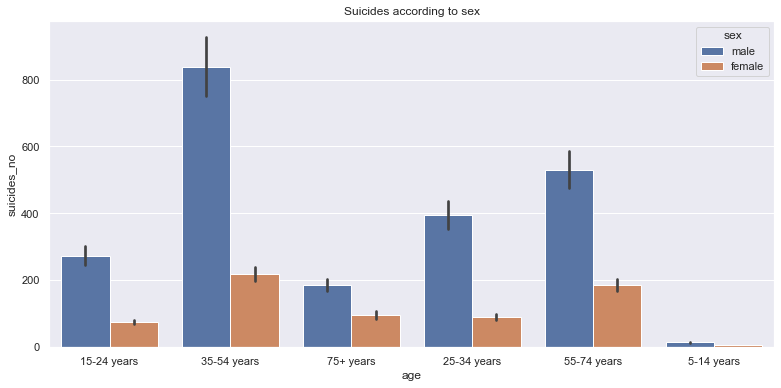

In [11]:
#VISUALIZING Suicides number by age and sex
f,ax = plt.subplots(1,1,figsize=(13,6))
ax = sns.barplot(x = suicide['age'], y = 'suicides_no',
                  hue='sex',data=suicide).set_title('Suicides according to sex')

We do comparative study of number of suicides for male and female together.Males had higher number of suicide rate as compare to females.Common thing is that both male and female had highest suicide rate in the age group '35-54'years. 

Text(0, 0.5, 'suicides_no')

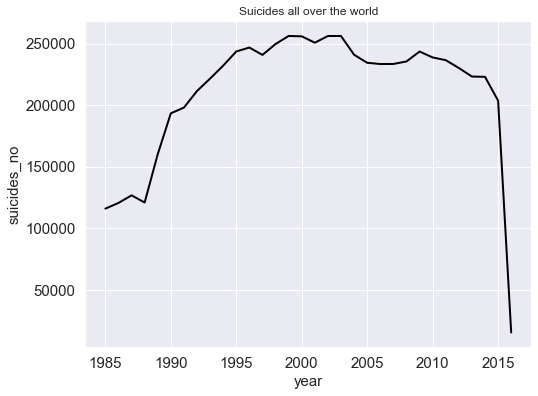

In [12]:
#Curve to know how rate is varying with year
ns = suicide['suicides_no'].groupby(suicide.year).sum()
ns.plot(figsize=(8,6), linewidth=2, fontsize=15,color='black').set_title('Suicides all over the world')
plt.xlabel('year', fontsize=15)
plt.ylabel('suicides_no',fontsize=15)

We can see that the rate of suicides is skyrocketting from 1985-2010 and then there's a decrease in the suicide count from 2010-15 .

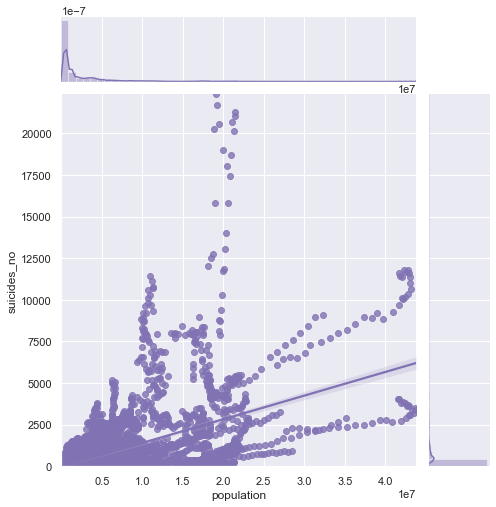

In [13]:
g = sns.jointplot("population", "suicides_no", data=suicide, kind="reg",
                  xlim=(260, 43805220), ylim=(0, 22340), color="m", height=7)


This is a jointplot between population and suicides number.

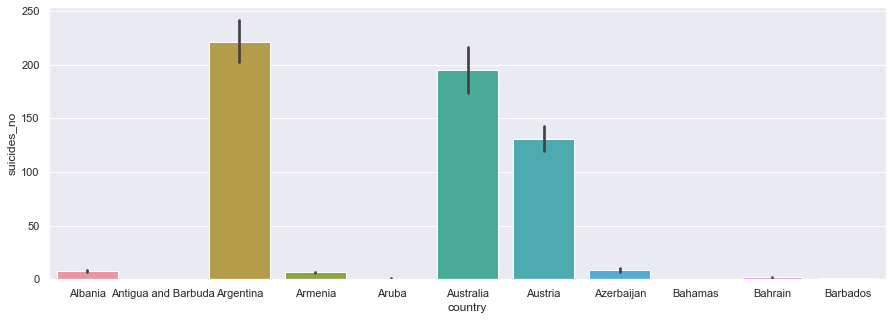

In [14]:
plt.figure(figsize=(15,5))
sns.barplot(suicide.country[:3000],suicide.suicides_no[:3000])
plt.show()

This bar graph shows the number of suicides of some of the country.

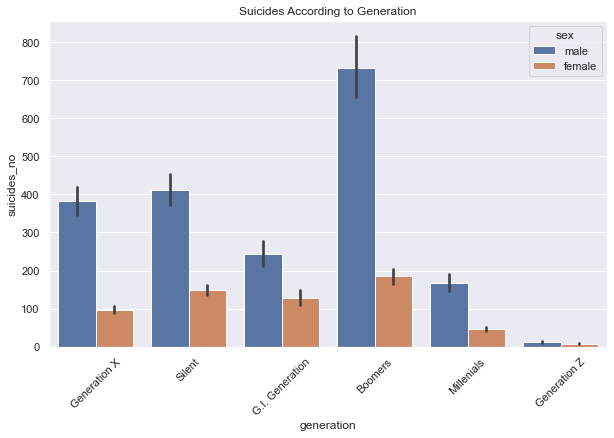

In [15]:
#Distribution of number of suicides according to generation
plt.figure(figsize=(10,6))
sns.barplot(x = "generation", y = "suicides_no", hue = "sex", data = suicide).set_title('Suicides According to Generation')
plt.xticks(rotation=45)
plt.show()

This shows that the Boomers generation shows the highest suicide rates.

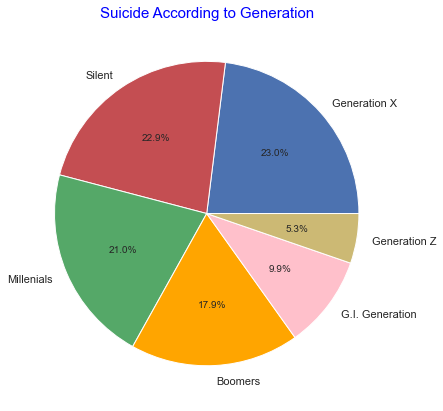

In [16]:
suicide.generation.dropna(inplace = True)
labels = suicide.generation.value_counts().index
colors = ['b','r','g','orange','pink','y']
explode = [0,0,0,0,0,0]
sizes = suicide.generation.value_counts().values

# visual 
plt.figure(0,figsize = (7,7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Suicide According to Generation',color = 'blue',fontsize = 15)
plt.show()

# Feature Engineering

In [17]:
suicide.drop(["country-year","gdp_per_capita ($)","HDI for year"],axis=1,inplace=True) 

In [18]:
suicides_in_1985 = suicide[(suicide['year'] == 1985)]
suicides_in_1985 = suicides_in_1985.groupby('country')[['suicides_no']].sum().reset_index() #reset index of dataframe
suicides_in_1985.head()

,country,suicides_no
0,Antigua and Barbuda,0
1,Argentina,1988
2,Australia,1861
3,Austria,2091
4,Bahamas,1


In [19]:
suicides_in_1985 = suicides_in_1985.sort_values(by='suicides_no', ascending=False) #Descending order of suicide count
suicides_in_1985.head()

,country,suicides_no
46,United States,29446
24,Japan,23257
16,France,12501
41,Sri Lanka,5668
45,United Kingdom,5105


In [20]:
# Number of suicides in 2016
suicides_in_2016 = suicide[(suicide['year'] == 2016)]
suicides_in_2016 = suicides_in_2016.groupby('country')[['suicides_no']].sum().reset_index() #reset index of dataframe
suicides_in_2016.head()

,country,suicides_no
0,Armenia,67
1,Austria,1201
2,Croatia,683
3,Cyprus,36
4,Czech Republic,1318


In [21]:
suicides_in_2016 = suicides_in_2016.sort_values(by='suicides_no', ascending=False) #Desccending order of suicide count
suicides_in_2016

,country,suicides_no
15,Thailand,4117
13,Romania,1953
11,Netherlands,1886
6,Hungary,1761
4,Czech Republic,1318
1,Austria,1201
14,Sweden,1130
8,Lithuania,822
2,Croatia,683
10,Mongolia,423


As we can see and conclude from the barplots that males comparatively commits more suicide than woman and males between the age of 35-54 are likely to commit more suicides followed by males of 55-74years

In [22]:
suicide['age'] = suicide['age'].map({'5-14 years':0,'15-24 years':1,'25-34 years':2,'35-54 years':3,'55-74 years':4,'75+ years':5})
suicide.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),generation
0,Albania,1987,male,1,21,312900,6.71,"2,156,624,900",Generation X
1,Albania,1987,male,3,16,308000,5.19,"2,156,624,900",Silent
2,Albania,1987,female,1,14,289700,4.83,"2,156,624,900",Generation X
3,Albania,1987,male,5,1,21800,4.59,"2,156,624,900",G.I. Generation
4,Albania,1987,male,2,9,274300,3.28,"2,156,624,900",Boomers


In [23]:
from sklearn.preprocessing import LabelEncoder
lr=LabelEncoder() 
suicide['sex']=lr.fit_transform(suicide['sex'])
suicide.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),generation
0,Albania,1987,1,1,21,312900,6.71,"2,156,624,900",Generation X
1,Albania,1987,1,3,16,308000,5.19,"2,156,624,900",Silent
2,Albania,1987,0,1,14,289700,4.83,"2,156,624,900",Generation X
3,Albania,1987,1,5,1,21800,4.59,"2,156,624,900",G.I. Generation
4,Albania,1987,1,2,9,274300,3.28,"2,156,624,900",Boomers


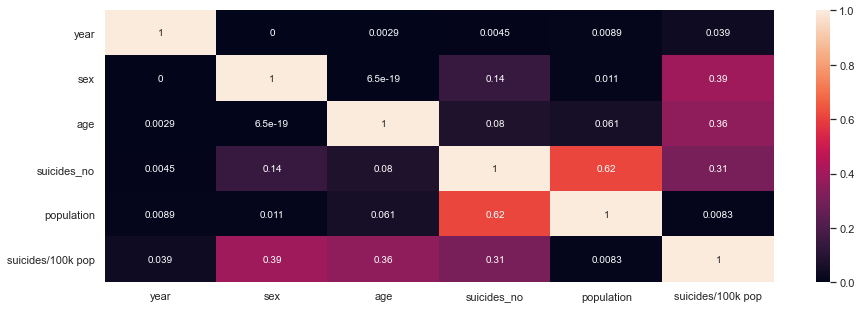

In [24]:
#Seeing the heatmap to understand correlation between columns in dataset
plt.figure(figsize=(15, 5))
sns.heatmap(suicide.corr().abs(),  annot=True)
plt.show()

This heatmap basically shows the correlation among different columns.From this heatmap,we can say that suicides_no and population are linearly correlated.

In [25]:
suicide.corr()

,year,sex,age,suicides_no,population,suicides/100k pop
year,1.000000,0.000000e+00,2.932878e-03,-0.004546,0.008850,-0.039037
sex,0.000000,1.000000e+00,-6.453645e-19,0.144629,-0.011242,0.391496
age,0.002933,-6.453645e-19,1.000000e+00,0.079892,-0.060716,0.362587
suicides_no,-0.004546,1.446292e-01,7.989236e-02,1.000000,0.616162,0.306604
population,0.008850,-1.124208e-02,-6.071612e-02,0.616162,1.000000,0.008285
suicides/100k pop,-0.039037,3.914965e-01,3.625866e-01,0.306604,0.008285,1.000000


# Predicting Data and Applying Algorithm to it.

In [26]:
suicide.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),generation
0,Albania,1987,1,1,21,312900,6.71,"2,156,624,900",Generation X
1,Albania,1987,1,3,16,308000,5.19,"2,156,624,900",Silent
2,Albania,1987,0,1,14,289700,4.83,"2,156,624,900",Generation X
3,Albania,1987,1,5,1,21800,4.59,"2,156,624,900",G.I. Generation
4,Albania,1987,1,2,9,274300,3.28,"2,156,624,900",Boomers


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression #y=mx+c
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [77]:
# Let's scale the columns before plotting them against MEDV
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
column_sels = ['population','year','sex','age']
x = suicide.loc[:,column_sels]
y = suicide['suicides_no']
#x=sc.fit_transform(x)

In [78]:
x

,population,year,sex,age
0,312900,1987,1,1
1,308000,1987,1,3
2,289700,1987,0,1
3,21800,1987,1,5
4,274300,1987,1,2
...,...,...,...,...
27815,3620833,2014,0,3
27816,348465,2014,0,5
27817,2762158,2014,1,0
27818,2631600,2014,0,0


In [79]:
X_train,X_test,y_train,y_test=train_test_split(x_poly,y,test_size=.1,random_state=0)

In [106]:
from sklearn.preprocessing import PolynomialFeatures
polynom=PolynomialFeatures(degree=3)
x_poly=polynom.fit_transform(x)
lr=LinearRegression()
lr.fit(x_poly,y)

LinearRegression()

In [107]:
X_test

array([[1.000000e+00, 4.391802e+06],
       [1.000000e+00, 3.132950e+05],
       [1.000000e+00, 4.301203e+06],
       ...,
       [1.000000e+00, 2.659000e+05],
       [1.000000e+00, 1.481391e+06],
       [1.000000e+00, 9.472100e+04]])

In [108]:

y_pred_lr=lr.predict(x_poly)

In [109]:
y_pred_lr

array([  21.52050357,   65.3172762 ,   21.31835946, ...,  -48.63708626,
       -158.49929119,   84.45014613])

In [110]:
from sklearn.metrics import r2_score, mean_squared_error


In [111]:
y_test

5820     453
23242    134
25643     38
24011    650
21706      1
        ... 
8039      12
22631     87
22608     38
6716     495
25521      9
Name: suicides_no, Length: 2782, dtype: int64

In [112]:
r2_score(y,y_pred_lr) #unknown, or prediction accuracy

0.6636283060070287

In [91]:
mean_squared_error(y,y_pred_lr)

273692.59478961903

In [40]:
column_sels = ['population']
x = suicide.loc[:,column_sels]
y = suicide['suicides_no']
#x=sc.fit_transform(x)

In [41]:
from sklearn.metrics import r2_score, mean_squared_error

from sklearn.neighbors import KNeighborsRegressor
neigh=KNeighborsRegressor(n_neighbors=11)

X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.1,random_state=0)


In [42]:
neigh.fit(X_train, y_train)
y_pred_neigh=neigh.predict(X_test)

In [43]:
r2_score(y_pred_neigh,y_test)

-0.1590872375524628

In [44]:
lr=LinearRegression()
lr.fit(X_train,y_train)
lr.score(X_train,y_train) # known

0.37885708989663136

In [45]:
mean_squared_error(y_test,y_pred_neigh)

416066.4881944734

In [46]:
from sklearn.tree import DecisionTreeRegressor

In [47]:
regressor=DecisionTreeRegressor()

In [48]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.1,random_state=0)
#

In [49]:
 regressor.fit(X_train,y_train)

DecisionTreeRegressor()

In [50]:
y_pred_decision=regressor.predict(X_test)

In [51]:
y_pred_decision

array([132. ,  13. ,   8. , ...,  14.5, 426. ,  23. ])

In [52]:
y_test

5820     453
23242    134
25643     38
24011    650
21706      1
        ... 
8039      12
22631     87
22608     38
6716     495
25521      9
Name: suicides_no, Length: 2782, dtype: int64

In [53]:
r2_score(y_pred_decision,y_test)

-0.15459967485546722

# CONCLUSION

Here we have applied linear regression,K-Neighbours algorithm,Decision Tree Algorithm and recieved an accuracy of 66% by linear regression algorithm with polynomial features.